In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plt.rcParams["figure.figsize"] = (15,15)

In [5]:
img = load_img('images/Louvre.jpeg')

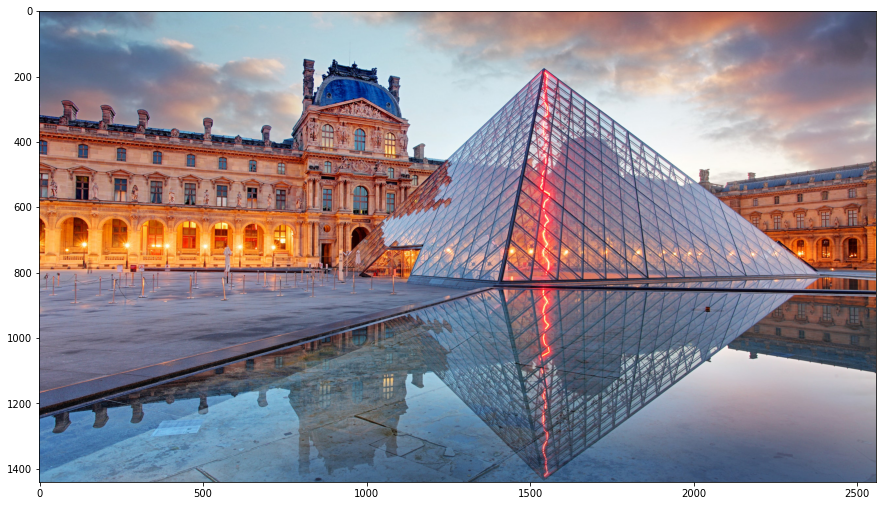

In [8]:
plt.imshow(img)

# Shiftare(mutare) pe verticala sau orizontala

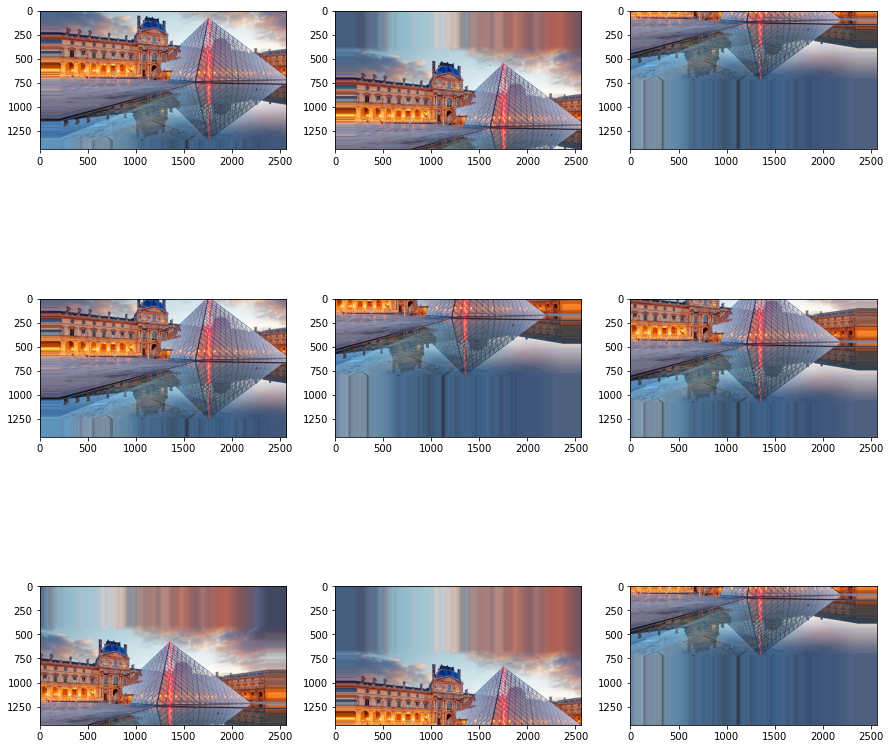

In [11]:
data = img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200], height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

# Intoarcere/oglindire pe orizontala/verticala

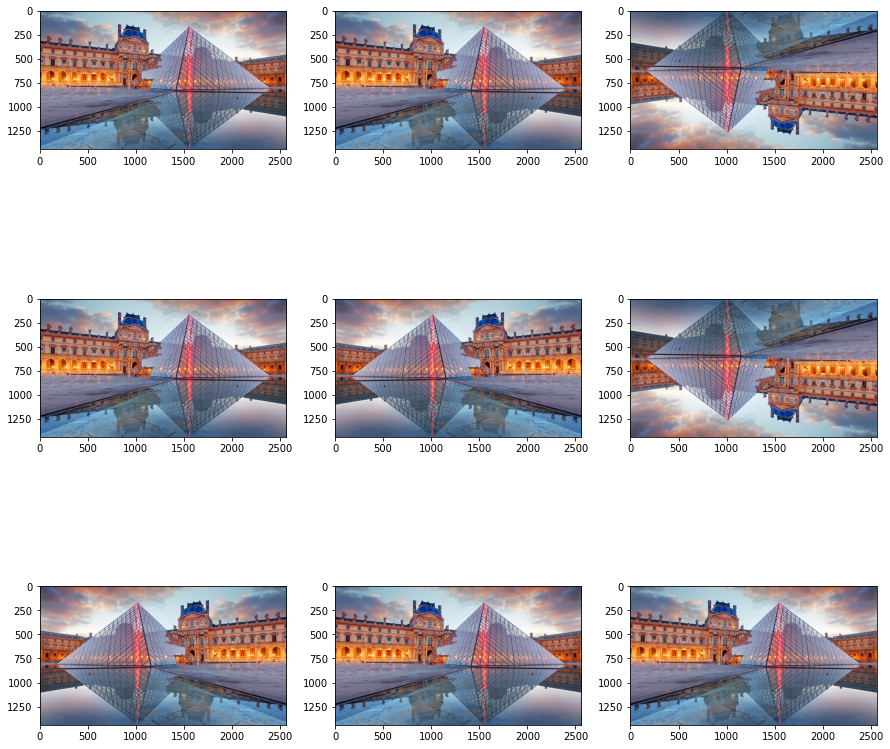

In [12]:
data = img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

# Rotatii aleatoare

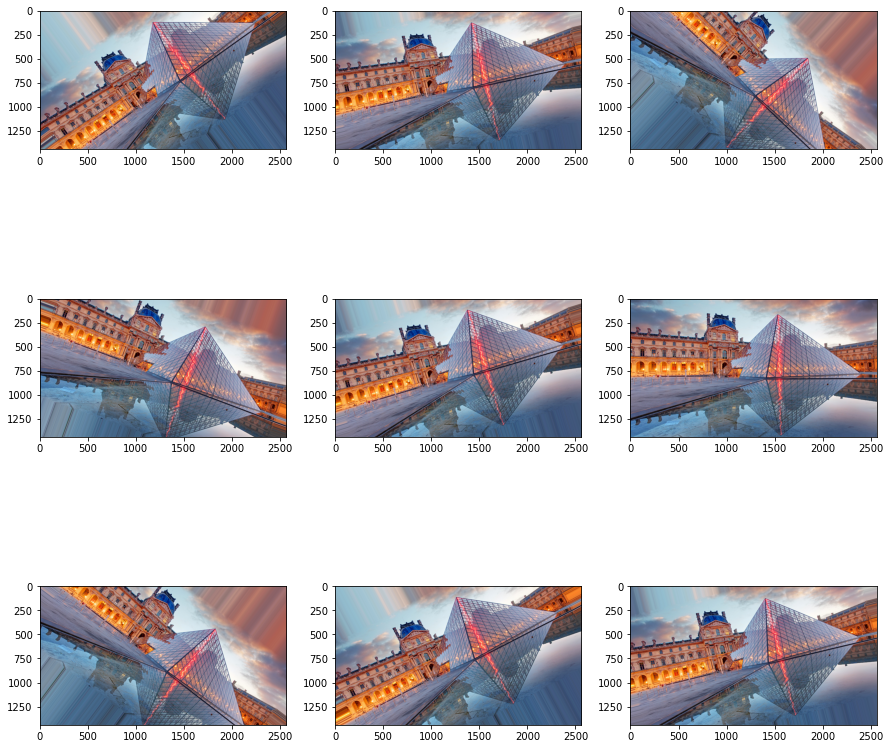

In [13]:
data = img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=45)
# prepare iterator
it = datagen.flow(samples, batch_size=1)

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

# Varierea luminozitatii

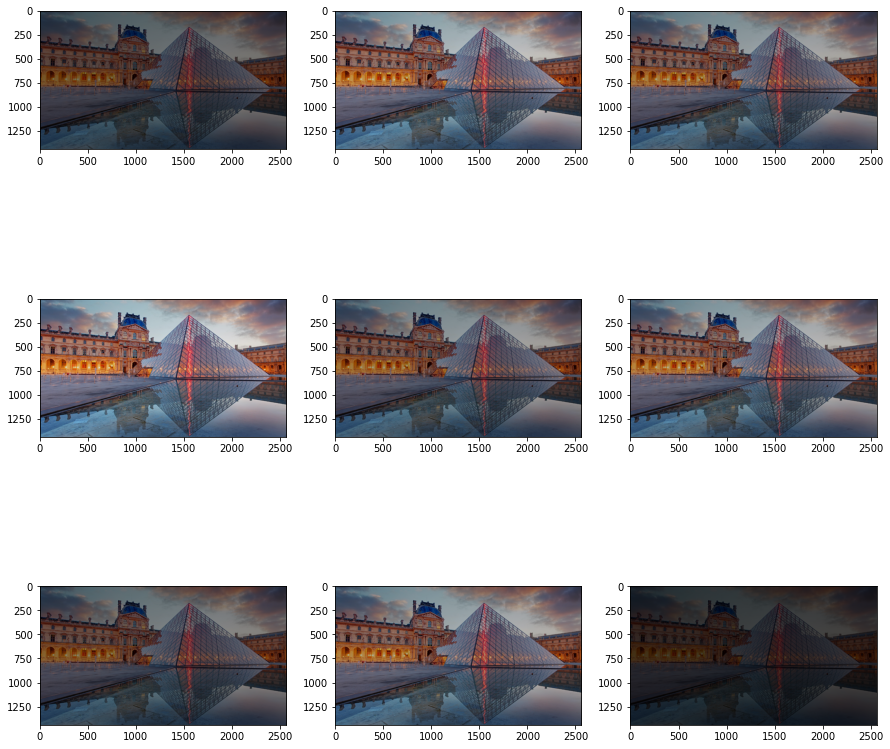

In [14]:
data = img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

# Zoom-uri random

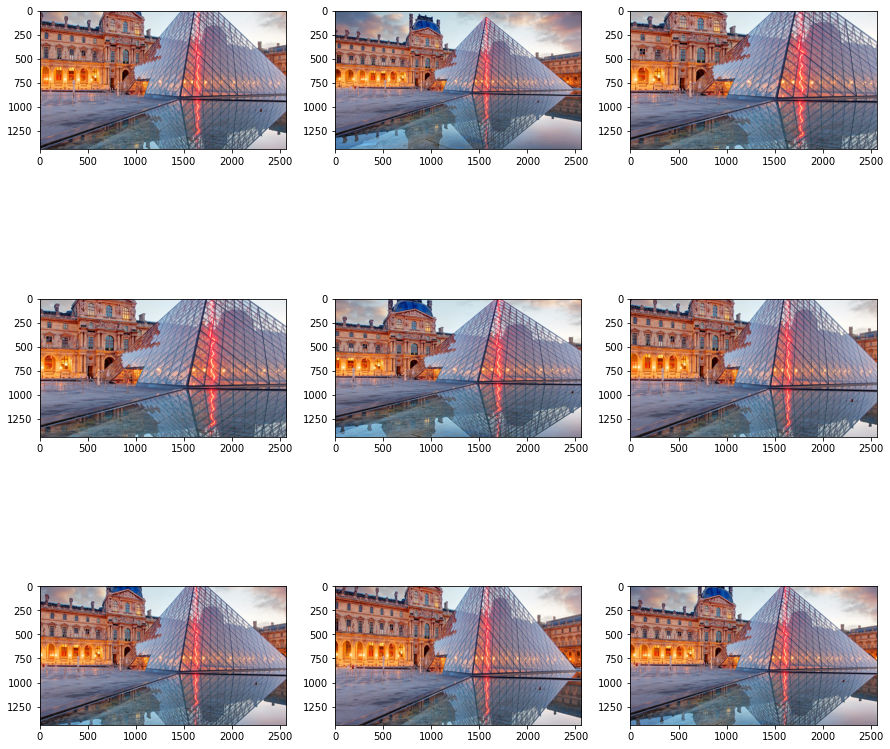

In [15]:
data = img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

# Cum le putem folosi practic?

Intr-o aplicatie practica trebuie sa utilizam doar acele metode care ar avea logica si pot reprezenta situatii care pot aparea in realitate dar nu sunt captate in setul de antrenare. Sa vedem cum am putea sa utilizam augmentarea datelor pentru setul de date Fashion MNIST. 

In [30]:
from tensorflow.keras.datasets.fashion_mnist import load_data
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input, Dropout

In [17]:
(X_train, y_train), (X_test, y_test) = load_data()

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

In [21]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

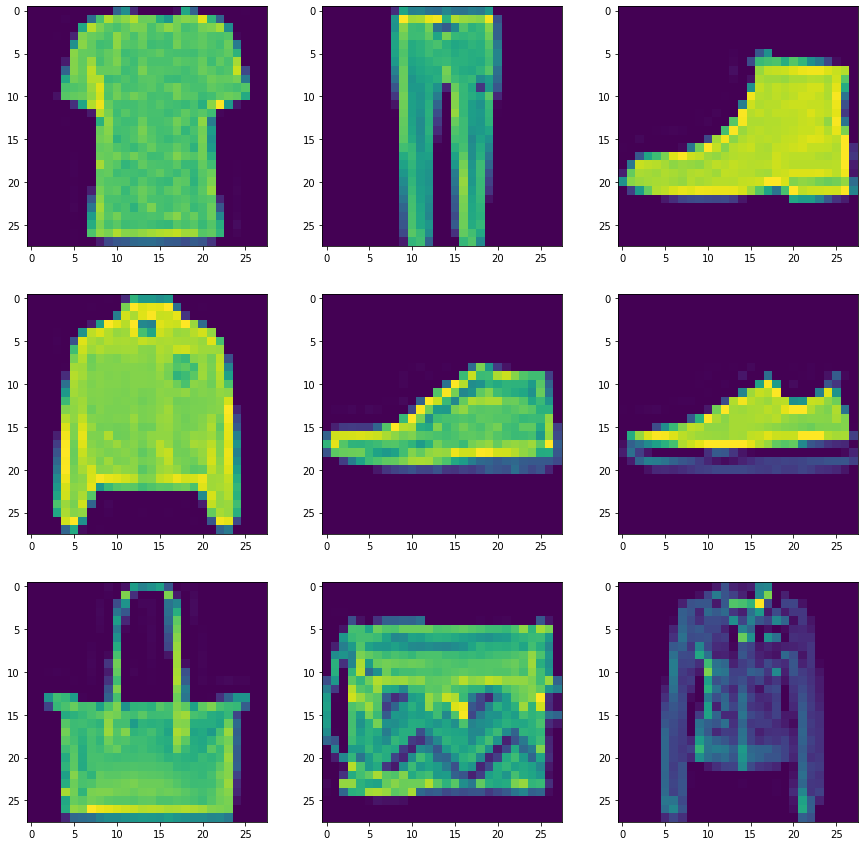

In [22]:
datagen = ImageDataGenerator()
# prepare iterator
it = datagen.flow(X_train, batch_size=1)

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

Putem incerca sa adaugam urmatoarele augmentari:
- modificarea luminozitatii
- rotatii(unghiuri mici)
- oglindire in jurul axei Oy

In [29]:
datagen = ImageDataGenerator(
    brightness_range=[0.7,1.0],
    rotation_range=5,
    horizontal_flip=True
)
# prepare iterator
it = datagen.flow(X_train, y=y_train, batch_size=128)

In [33]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (5,5), padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64, (5,5), padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [35]:
model.fit_generator(
    it,
    epochs=10,
    validation_data=(X_test, y_test)
)

/Users/cosmin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
469/469 [==============================] - 53s 110ms/step - loss: 3.6422 - accuracy: 0.6817 - val_loss: 0.4654 - val_accuracy: 0.8374
Epoch 2/10
469/469 [==============================] - 51s 108ms/step - loss: 0.4323 - accuracy: 0.8404 - val_loss: 0.4206 - val_accuracy: 0.8536
Epoch 3/10
469/469 [==============================] - 49s 105ms/step - loss: 0.3743 - accuracy: 0.8623 - val_loss: 0.3730 - val_accuracy: 0.8725
Epoch 4/10
469/469 [==============================] - 50s 106ms/step - loss: 0.3391 - accuracy: 0.8760 - val_loss: 0.3536 - val_accuracy: 0.8776
Epoch 5/10
469/469 [==============================] - 50s 106ms/step - loss: 0.3194 - accuracy: 0.8816 - val_loss: 0.3314 - val_accuracy: 0.8867
Epoch 6/10
469/469 [==============================] - 49s 105ms/step - loss: 0.3074 - accuracy: 0.8877 - val_loss: 0.3255 - val_accuracy: 0.8879
Epoch 7/10
469/469 [==============================] - 47s 101ms/step - loss: 0.3015 - accuracy: 0.8892 - val_loss: 0.3332 - val_ac

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3066 - accuracy: 0.8912


[0.306574285030365, 0.8912000060081482]